## Bivariate Visualizations: Numeric to Numeric

#### Scatterplots

Visualizing numeric-to-numeric relationships is a great way to better understand both the correlation coefficient (r) and the assumptions (continuous data, linearity, and heteroscedasticity). While there are many useful visualizations for numeric-to-numeric relationships, scatterplots are the most basic and common. 

Matplotlib is the original visualization package in python and most new packages are built on top of it. The .scatter() method is used to create scatterplots. The scatter function has several parameters, such as markers, that can specify the symbol used to visually display the data. The default is a point or a dot.

Let's analyze the relationship between IMDB features - rating and metascore.

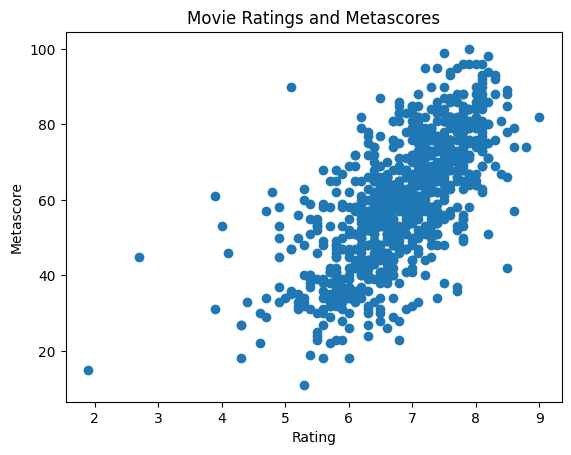

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/imdb_cleaned.csv')
df= df.dropna()

plt.scatter(df.Rating, df.Metascore)
plt.title('Movie Ratings and Metascores')
plt.xlabel('Rating')
plt.ylabel('Metascore')
plt.show()

In [18]:
df.Rating.corr(df.Metascore)

0.6727311464226436

Scatterplots can also be a very helpful tool to compare different groups of data. Let’s separate the movies into genres based on Drama versus Action movies by creating two filtered DataFrames:

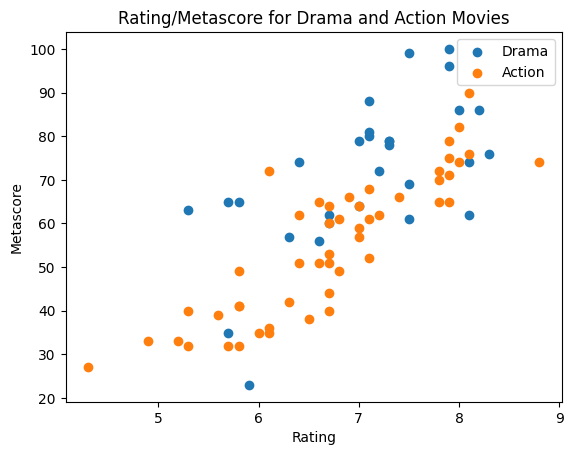

In [19]:
#Create two DataFrames
drama = df[df.Genre == 'Drama']
action = df[df.Genre == 'Action,Adventure,Sci-Fi']

# Create the scatter plots; both on the same object: plt
plt.scatter(drama.Rating, drama.Metascore, label='Drama')
plt.scatter(action.Rating, action.Metascore, label='Action')

# Add a legend, title, and labels
plt.legend()
plt.title('Rating/Metascore for Drama and Action Movies')
plt.xlabel('Rating')
plt.ylabel('Metascore')
plt.show()

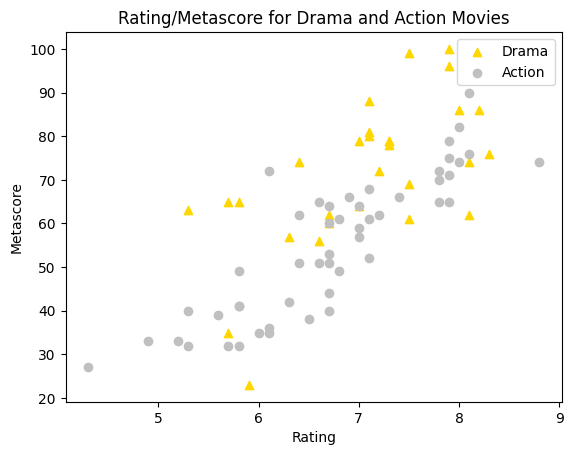

In [20]:
# Create scatter plots and add values for marker and color
plt.scatter(drama.Rating, drama.Metascore, label='Drama', marker='^', color='gold')
plt.scatter(action.Rating, action.Metascore, label='Action', marker='o', color='silver')

# Add a legend, title, and labels
plt.legend()
plt.title('Rating/Metascore for Drama and Action Movies')
plt.xlabel('Rating')
plt.ylabel('Metascore')
plt.show()

#### Line of Best Fit

You are now familiar with scatterplots. Depending on your high school algebra background, you may also be familiar with the concept of lines of regression (or line of best fit or trendline). Adding regression lines to scatterplots helps a data analyst further understand the nature of the relationship between two numeric variables.

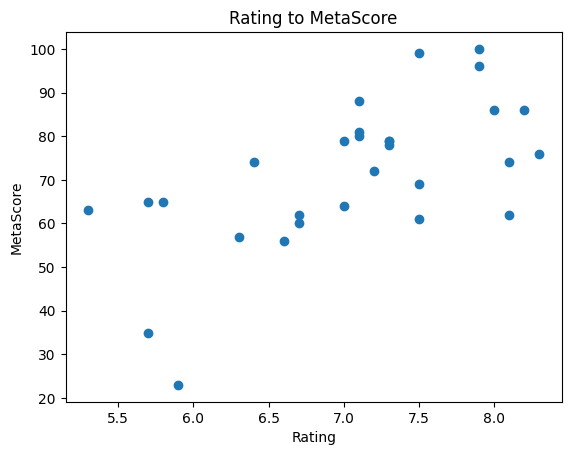

r = 0.6292
p = 0.0003


In [21]:
from scipy import stats
from matplotlib import pyplot as plt

plt.scatter(drama.Rating, drama.Metascore)
plt.title('Rating to MetaScore')
plt.xlabel('Rating')
plt.ylabel('MetaScore')
plt.show()

corr = stats.pearsonr(drama.Rating, drama.Metascore)
print('r = ' + str(round(corr[0], 4)))
print('p = ' + str(round(corr[1], 4)))

# Output:
# r = 0.7086
# p = 0.0

Visually, we can see that there is a relationship between the variables. The correlation coefficient (r) and p-value also indicate that this relationship is quite strong. However, r and p do not tell us about the slope of the relationship, which is necessary information to actually make predictions. In particular, we want to know what the label is expected to be for all likely values of the feature. Remember the y = mx + b formula that was drilled into you in High School? Well, now all of that time you spent learning plots, slopes, and intercepts is going to be put to good use. Let’s add a trendline that is based on the y = mx + b formula to the scatterplot. We calculate that formula by fitting an ordinary least squares (OLS) regression model. This means that a line formula that represents the minimized squared distance from each actual plotted value and the predicted value (i.e., minimizing the sum of squared residuals) is calculated, thus representing the best prediction of the label for each value of the feature. The linear regression formula generates five values:

m: the slope of the regression line

b: the y-intercept of the line (i.e., the value of y when x is zero)

r: the Pearson correlation coefficient (r)

p: the p-value of r

err: the amount of average error across all predictions (i.e., across all values of x); think of this as the inverse of r, but on a scale from 0 to infinity.

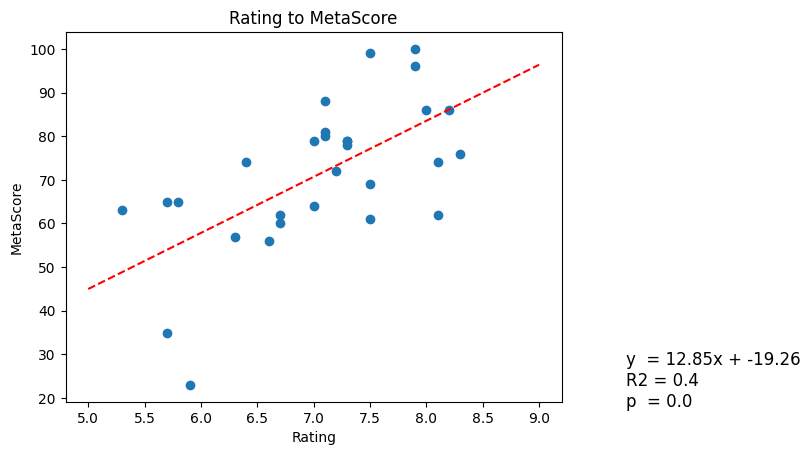

In [44]:
plt.scatter(drama.Rating, drama.Metascore)
plt.title('Rating to MetaScore')
plt.xlabel('Rating')
plt.ylabel('MetaScore')


# Calculate the regression line
m, b, r, p, err = stats.linregress(drama.Rating, drama.Metascore)

# Create the index used for the line plot by using the range function from 
# zero to the max value of the numeric feature
maxnum = drama.Rating.max()
minnum = drama.Rating.min()
nums = range(int(minnum), int(maxnum+2))

# This line plot requires(index list, slope * index list + y-intercept, line format)
# For a complete list of line formats: https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html
plt.plot(nums,m * nums + b,"r--")

# Add the formula, r squared, and p-value to the figure
textstr  = 'y  = ' + str(round(m, 2)) + 'x + ' + str(round(b, 2)) + '\n'
textstr += 'R2 = ' + str(round(r**2, 2)) + '\n'
textstr += 'p  = ' + str(round(p, 2))
plt.text(1, 0.1, textstr, fontsize=12, transform=plt.gcf().transFigure)
plt.show()

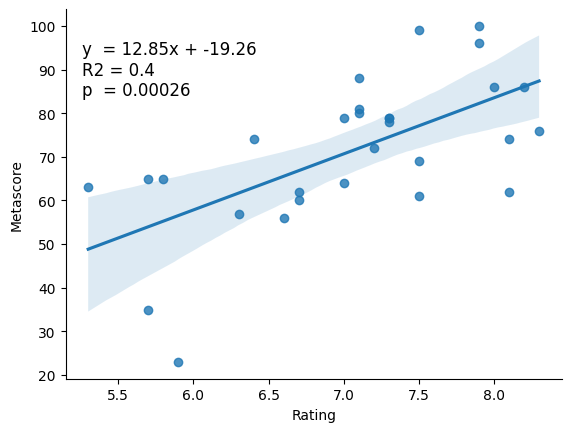

In [43]:
import seaborn as sns

sns.regplot(data=drama, x='Rating', y='Metascore') # The regression line is built-in to the .regplot object
sns.despine(top=True, right=True)

# Calculate the regression line
m, b, r, p, err = stats.linregress(drama.Rating, drama.Metascore)

# Add the formula, r squared, and p-value to the figure
textstr  = 'y  = ' + str(round(m, 2)) + 'x + ' + str(round(b, 2)) + '\n'
textstr += 'R2 = ' + str(round(r**2, 2)) + '\n'
textstr += 'p  = ' + str(round(p, 5))
plt.text(0.15, 0.70, textstr, fontsize=12, transform=plt.gcf().transFigure)
plt.show()

### Heteroscedasticity

Let’s look at a different scatterplot - housing. 

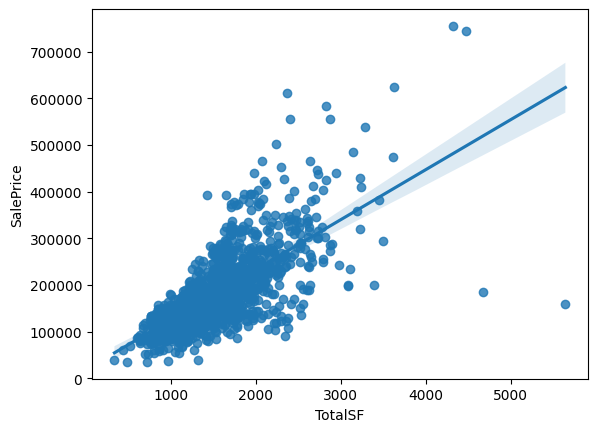

In [35]:
housing = pd.read_csv('data/housing.csv')

sns.regplot(data=housing, x='TotalSF', y='SalePrice');

It is clear that the dots become more spread out across higher square footage. This violates the assumption of homoscedasticity. What can we do about it? Well, we’ll learn about that when it comes time to clean and prepare the data. For now, we need to learn how to find out how much heteroscedasticity is “too much.” Thankfully, there is a test for this. 

To evaluate heteroscedasticity, we will learn two tests (there are many). They both require the same OLS model formula that we ran previously to get the line of regression in the scatterplot. However, we need to run the OLS from a different package that includes a few extra outputs and uses a slightly different input format. Once that model is fit (i.e., the line is drawn to minimize the sum of squared residuals), then we can call the White test and Breusch-Pagan test of heteroscedasticity. They both generate the same four statistics:

Lagrange multiplier (LM) stat

p-value for LM

F-statistic for the LM stat

p-value for the F stat

We generally care most about the F-stat and its corresponding p-value. If that p-value is below 0.05, then we have a problem with heteroscedasticity that will need to be addressed later in the Data Preparation phase. For now, we simply want to document any low p-values from either test for heteroscedasticity (Breusch-Pagan or White)

In [38]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the OLS model
model = ols(formula='SalePrice~TotalSF', data=housing).fit()

white_test = het_white(model.resid,  model.model.exog)
bp_test = het_breuschpagan(model.resid, model.model.exog)

output_df = pd.DataFrame(columns=['LM stat', 'LM p-value', 'F-stat', 'F p-value'])
output_df.loc['White'] = white_test
output_df.loc['Breusch-Pagan'] = bp_test

output_df.round(3)

,LM stat,LM p-value,F-stat,F p-value
White,662.584,0.0,605.320,0.0
Breusch-Pagan,318.132,0.0,406.209,0.0


#### Kernel Density Plot

In [40]:
df = pd.read_csv('data/pokemon.csv')
df.head()

,name,type1,type2,weight_kg,hp,attack,defense,speed,generation,is_legendary
0,Bulbasaur,grass,poison,6.9,45,49,49,45,1,0
1,Ivysaur,grass,poison,13.0,60,62,63,60,1,0
2,Venusaur,grass,poison,100.0,80,100,123,80,1,0
3,Charmander,fire,NaN,8.5,39,52,43,65,1,0
4,Charmeleon,fire,NaN,19.0,58,64,58,80,1,0


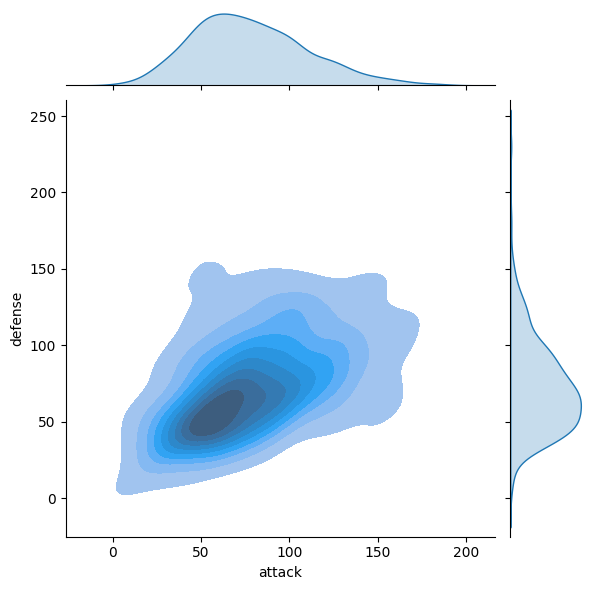

In [41]:
# Kernel density plot
      
sns.jointplot(data=df, x="attack", y="defense", kind="kde", fill=True);

#### Pair Plot

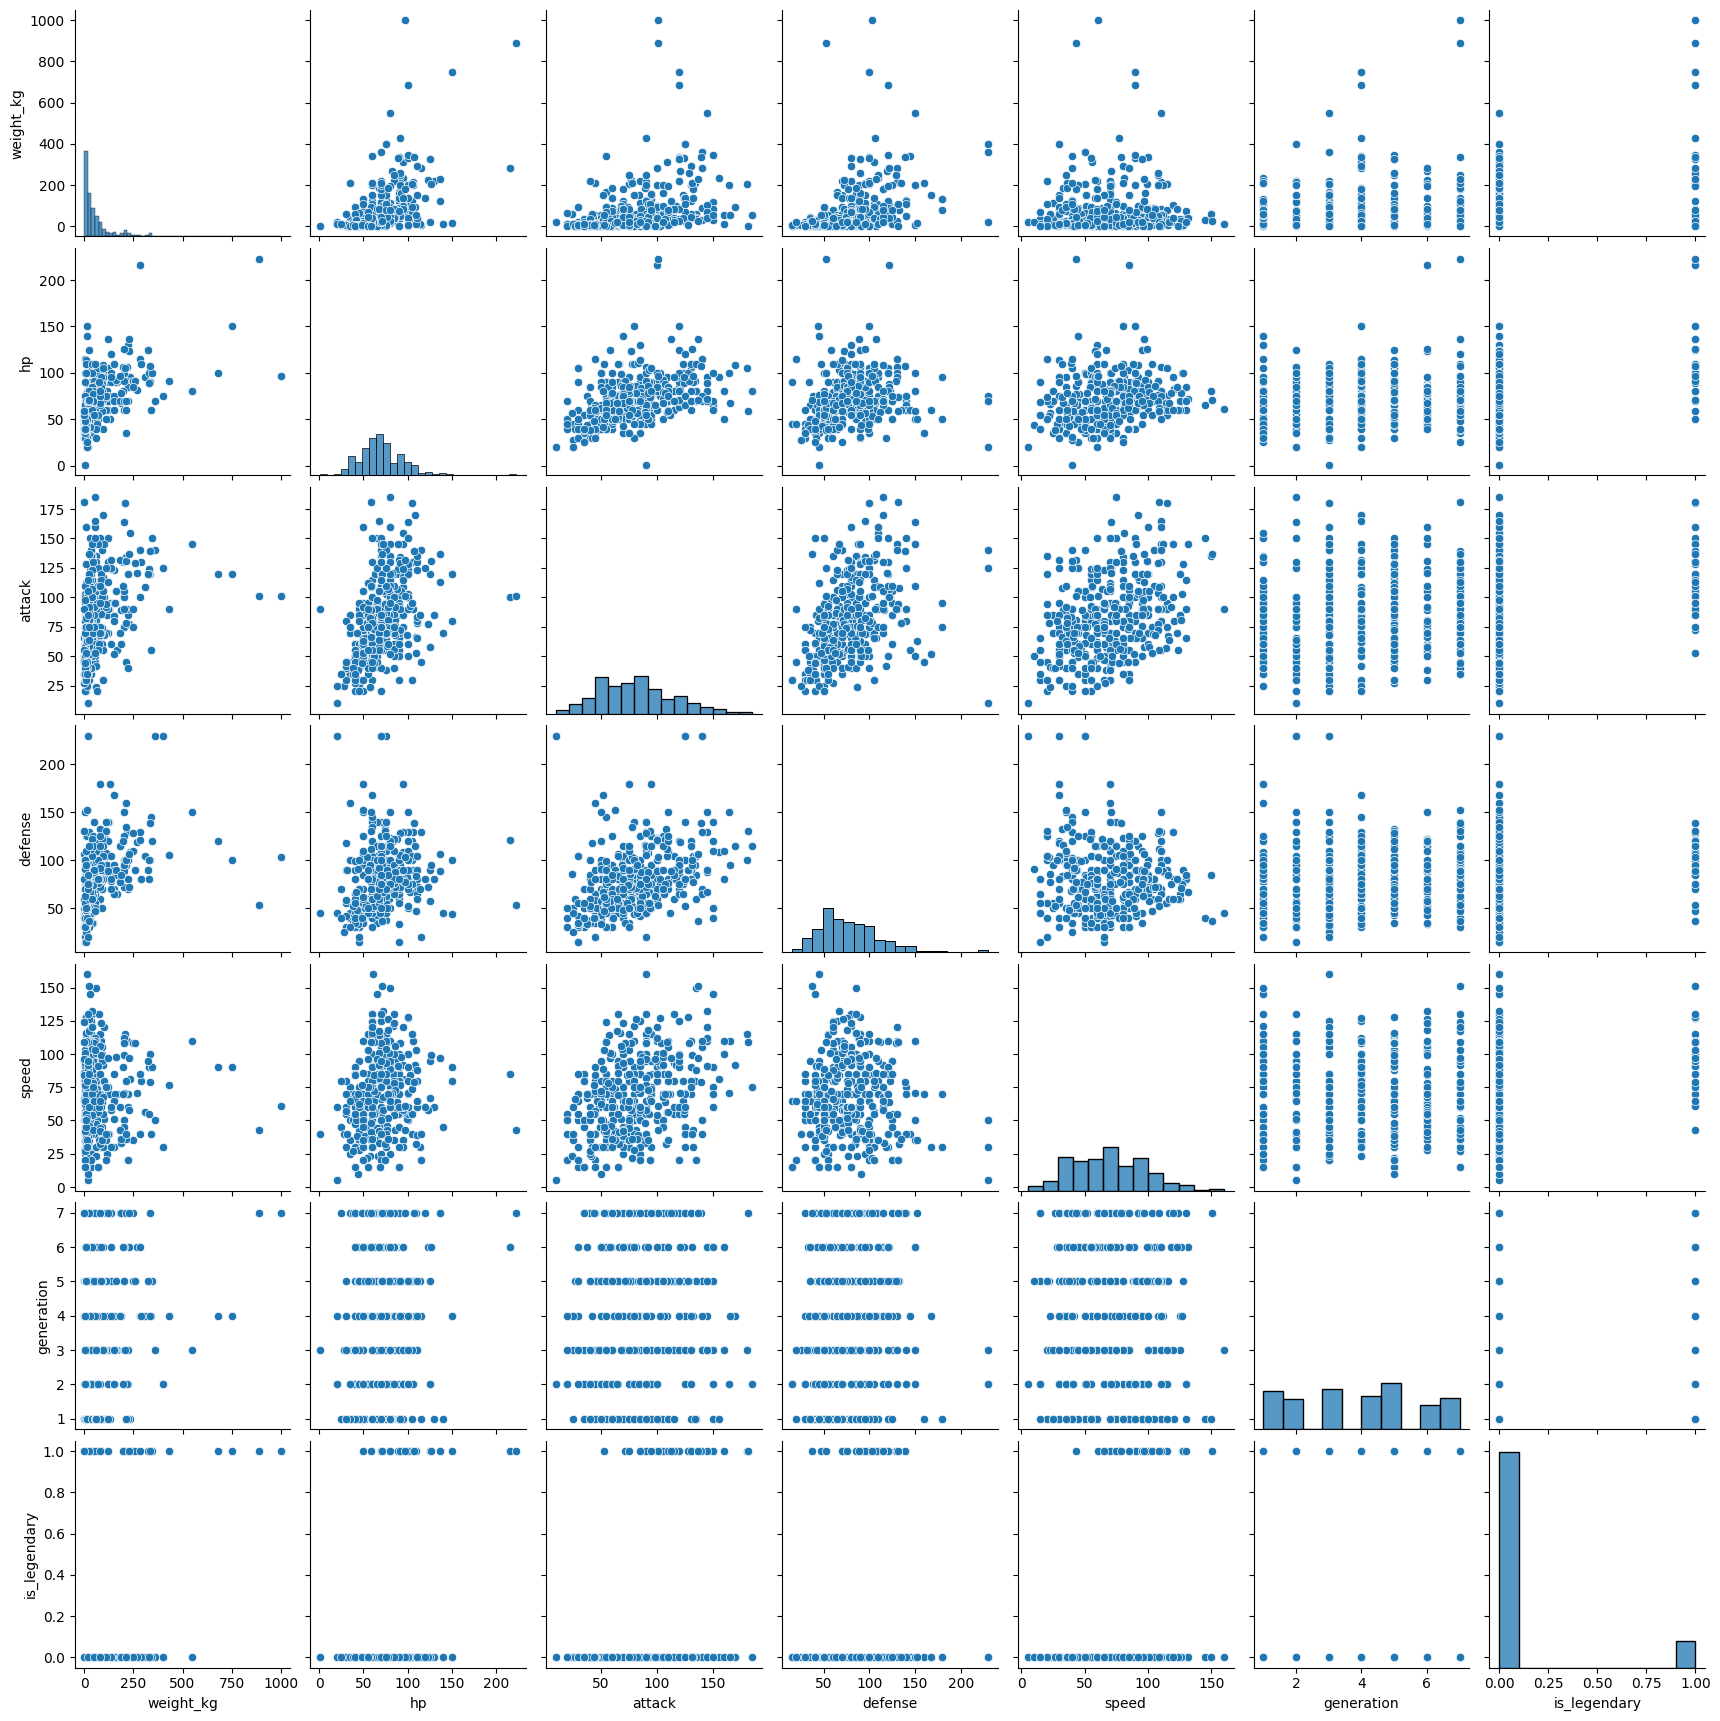

In [42]:
# Pairplot()

df.dropna(inplace=True) # remove null values first
sns.pairplot(df);